### __Load Data__

In [48]:
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

### __Feature Engineering__

In [49]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)



feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

### __Baseline wind energy forecast__

In [50]:
import model_utils
import numpy as np
import importlib
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "qr_model_wind"

qr_model_wind = model_utils.QuantileRegressorModel(feature_engineerer_wind_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
qr_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_wind.pinball_score()}")

Saved Quantile Regressor model for quantile 0.1 to qr_model_wind\qr_model_quantile_0.1.pkl
Saved Quantile Regressor model for quantile 0.2 to qr_model_wind\qr_model_quantile_0.2.pkl
Saved Quantile Regressor model for quantile 0.3 to qr_model_wind\qr_model_quantile_0.3.pkl
Saved Quantile Regressor model for quantile 0.4 to qr_model_wind\qr_model_quantile_0.4.pkl
Saved Quantile Regressor model for quantile 0.5 to qr_model_wind\qr_model_quantile_0.5.pkl
Saved Quantile Regressor model for quantile 0.6 to qr_model_wind\qr_model_quantile_0.6.pkl
Saved Quantile Regressor model for quantile 0.7 to qr_model_wind\qr_model_quantile_0.7.pkl
Saved Quantile Regressor model for quantile 0.8 to qr_model_wind\qr_model_quantile_0.8.pkl
Saved Quantile Regressor model for quantile 0.9 to qr_model_wind\qr_model_quantile_0.9.pkl
Quantile Regressor Pinball Score: 29.548653036104035


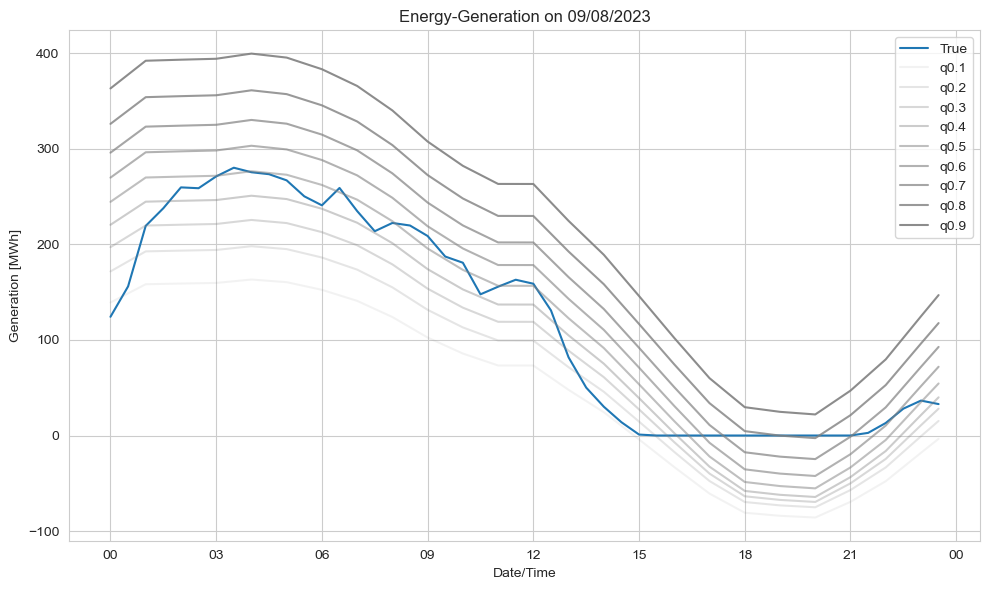

In [57]:
qr_model_wind.plot_quantils(feature_engineerer_wind_baseline.y_test.index, qr_model_wind.q_predictions, quantiles=quantiles, year=2023, month=8, day=9)

### __Baseline solar energy forecast__

In [58]:
quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "qr_model_solar"

qr_model_solar = model_utils.QuantileRegressorModel(feature_engineerer_solar_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
qr_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_solar.pinball_score()}")

Saved Quantile Regressor model for quantile 0.1 to qr_model_solar\qr_model_quantile_0.1.pkl
Saved Quantile Regressor model for quantile 0.2 to qr_model_solar\qr_model_quantile_0.2.pkl
Saved Quantile Regressor model for quantile 0.3 to qr_model_solar\qr_model_quantile_0.3.pkl
Saved Quantile Regressor model for quantile 0.4 to qr_model_solar\qr_model_quantile_0.4.pkl
Saved Quantile Regressor model for quantile 0.5 to qr_model_solar\qr_model_quantile_0.5.pkl
Saved Quantile Regressor model for quantile 0.6 to qr_model_solar\qr_model_quantile_0.6.pkl
Saved Quantile Regressor model for quantile 0.7 to qr_model_solar\qr_model_quantile_0.7.pkl
Saved Quantile Regressor model for quantile 0.8 to qr_model_solar\qr_model_quantile_0.8.pkl
Saved Quantile Regressor model for quantile 0.9 to qr_model_solar\qr_model_quantile_0.9.pkl
Quantile Regressor Pinball Score: 15.253271903353985


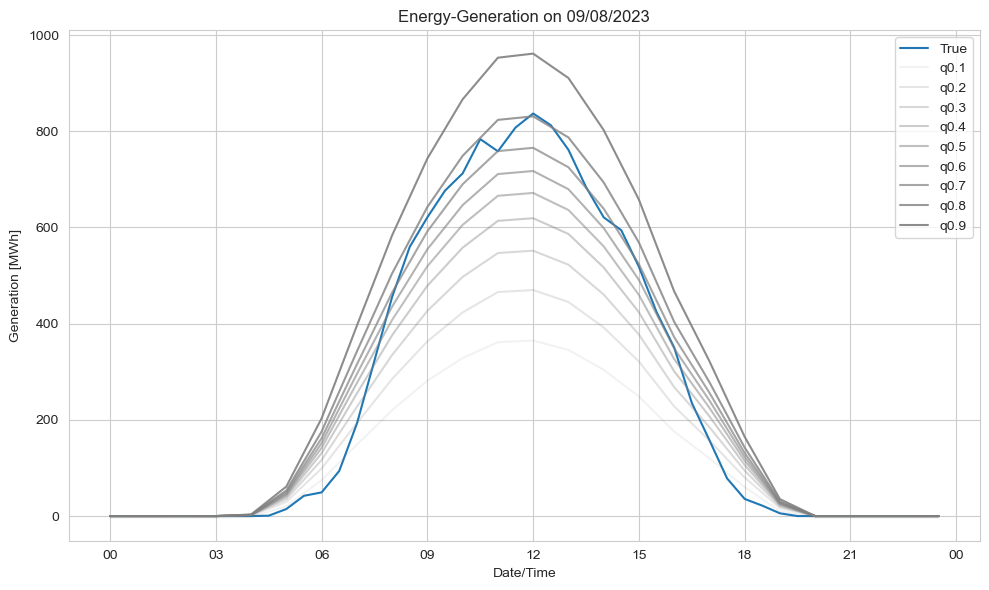

In [60]:
qr_model_solar.plot_quantils(daterange=feature_engineerer_solar_baseline.y_test.index, y=qr_model_solar.q_predictions, quantiles=quantiles, year=2023, month=8, day=9)

### __LightGBM wind energy forecast__

In [61]:
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind"

lgbm_model_wind = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind.pinball_score()}")

[LightGBM] [Info] Total Bins 11960
[LightGBM] [Info] Number of data points in the train set: 29231, number of used features: 65
[LightGBM] [Info] Start training from score 9.924001
Training until validation scores don't improve for 50 rounds
[50]	train's quantile: 9.77323	valid's quantile: 11.6876
[100]	train's quantile: 8.28087	valid's quantile: 11.6754
Early stopping, best iteration is:
[71]	train's quantile: 9.01414	valid's quantile: 11.5612
Saved Quantile Regressor model for quantile 0.1 to lgbm_model_wind\lgbm_model_quantile_0.1.pkl
[LightGBM] [Info] Total Bins 11960
[LightGBM] [Info] Number of data points in the train set: 29231, number of used features: 65
[LightGBM] [Info] Start training from score 46.169998
Training until validation scores don't improve for 50 rounds
[50]	train's quantile: 13.7512	valid's quantile: 17.9514
[100]	train's quantile: 12.1754	valid's quantile: 18.0291
Early stopping, best iteration is:
[69]	train's quantile: 13.0298	valid's quantile: 17.8291
Saved 

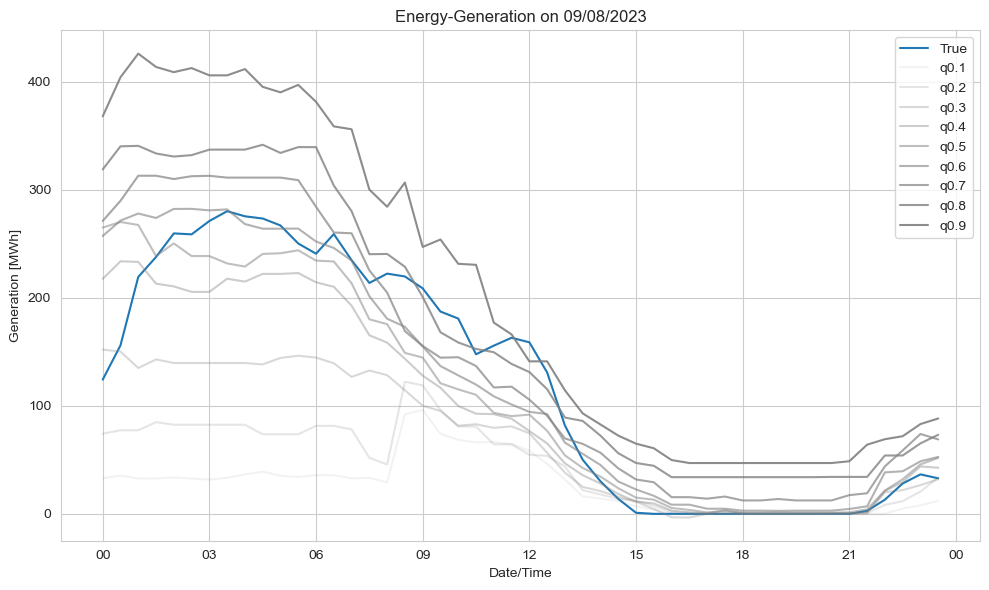

In [62]:
lgbm_model_wind.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind.q_predictions, quantiles, month=8, day=9)

### __LightGBM solar energy forecast__

In [63]:
quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar"

lgbm_model_solar = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar.pinball_score()}")

[LightGBM] [Info] Total Bins 10364
[LightGBM] [Info] Number of data points in the train set: 29231, number of used features: 47
Training until validation scores don't improve for 50 rounds
[50]	train's quantile: 4.82569	valid's quantile: 6.40726
[100]	train's quantile: 3.79819	valid's quantile: 5.73256
Early stopping, best iteration is:
[94]	train's quantile: 3.8437	valid's quantile: 5.71441
Saved Quantile Regressor model for quantile 0.1 to lgbm_model_solar\lgbm_model_quantile_0.1.pkl
[LightGBM] [Info] Total Bins 10364
[LightGBM] [Info] Number of data points in the train set: 29231, number of used features: 47
Training until validation scores don't improve for 50 rounds
[50]	train's quantile: 6.96261	valid's quantile: 9.40234
[100]	train's quantile: 5.68551	valid's quantile: 9.03766
Early stopping, best iteration is:
[81]	train's quantile: 5.91077	valid's quantile: 8.99938
Saved Quantile Regressor model for quantile 0.2 to lgbm_model_solar\lgbm_model_quantile_0.2.pkl
[LightGBM] [Info]

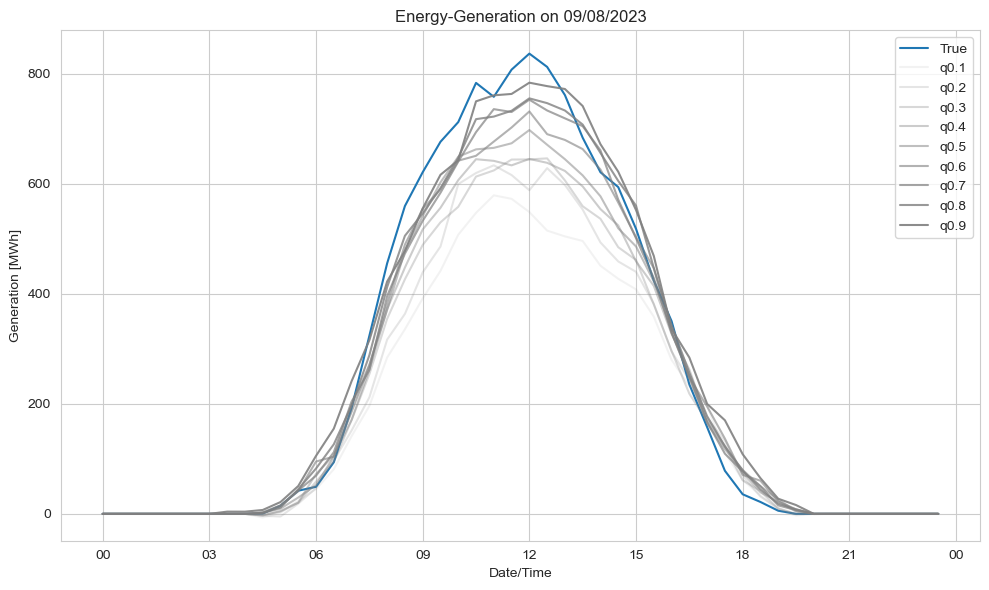

In [64]:
lgbm_model_solar.plot_quantils(feature_engineerer_solar.y_test.index, lgbm_model_solar.q_predictions, quantiles, year=2023, month=8, day=9)